In [1]:
nn = require 'nn';

***Convolutions***

In [2]:
module1 = nn.SpatialConvolutionMM(1, 16, 3, 3, 1,1, 1,1); 
--nn.SpatialConvolution(nInputPlane, nOutputPlane, kW, kH, [dW], [dH], [padW], [padH])

In [3]:
lena = image.lena() -- quintessential image for CV community, image.fabio() also there

In [4]:
lena[{{1}}]:size() --notice the slicing to get one channel

   1
 512
 512
[torch.LongStorage of size 3]



***Slicing***
https://github.com/torch/demos/blob/master/tensors/slicing.lua

In [5]:
p = module1:forward(lena[{{1}}]);

In [6]:
p:size()

  16
 512
 512
[torch.LongStorage of size 3]



**How do you derive dimensions of the output image? **  
Formula:   
owidth  = floor((width  + 2*padW - kW) / dW + 1)  
oheight = floor((height + 2*padH - kH) / dH + 1)

In [7]:
require 'math';
width = 512
height = 512
padW = 1
kW = 3
dW = 1
owidth = math.floor((width+2*padW-kW)/dW + 1)

In [8]:
owidth

512	


***Image before convolution operation***

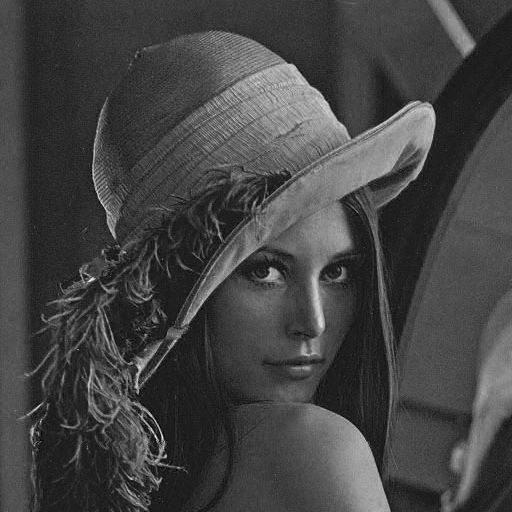

In [9]:
itorch.image(lena[3])

** 16 3x3 kernels applied to the image **

In [18]:
module1.weight

-0.2318 -0.0012  0.2330 -0.0106 -0.0301 -0.1328 -0.2868  0.1757 -0.0388
-0.2229  0.1288 -0.0301 -0.1297  0.3112 -0.0750 -0.2989 -0.0950  0.1918
 0.0055 -0.2554  0.3281 -0.0131 -0.0726  0.2738 -0.2460  0.2735 -0.0713
 0.3163 -0.1157 -0.0865 -0.1978  0.1786 -0.3168 -0.2255 -0.0732  0.1772
-0.2775  0.2697  0.1686  0.0398  0.2016 -0.0466 -0.2412  0.2370  0.2251
-0.2269  0.0408 -0.3128  0.2377  0.3072 -0.0547 -0.2377  0.2014  0.2732
 0.0026  0.0161 -0.2328  0.0581  0.2685  0.2011 -0.1396  0.0803  0.3133
-0.1220  0.2094 -0.0495 -0.0533  0.2512 -0.1959 -0.0157 -0.3322 -0.0736
 0.2091 -0.1334 -0.2220  0.3046  0.1177  0.1908  0.0251  0.1090 -0.3321
-0.1538  0.2934  0.1636 -0.0734  0.0358 -0.1119  0.0972 -0.1504 -0.1902
-0.3236  0.3042 -0.2915 -0.2183 -0.0432  0.0755 -0.0482  0.3116 -0.0845
-0.1576 -0.1435  0.2234 -0.1182  0.2934  0.2388  0.0388 -0.3108  0.0652
-0.3161 -0.0797  0.0539  0.2273  0.1031 -0.2559  0.0656  0.1719 -0.2997
 0.2946  0.1261 -0.1200  0.1084 -0.2364 -0.3088 -0.1073  0.1147 

***One of the 16 filter banks***

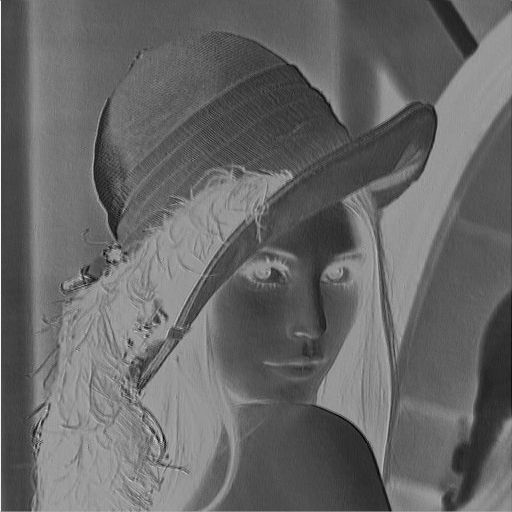

In [11]:
itorch.image(p[1])

** Aggregation/Pooling **

In [14]:
module2 = nn.SpatialMaxPooling(2,2) --nn.SpatialMaxPooling(kW, kH [, dW, dH, padW, padH])

In [15]:
q = module2:forward(p);

In [16]:
q:size()

  16
 256
 256
[torch.LongStorage of size 3]



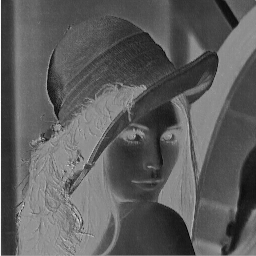

In [17]:
itorch.image(q[1])

*** Non-linearity ***

In [43]:
module3 = nn.ReLU()

In [44]:
r = module3:forward(q)

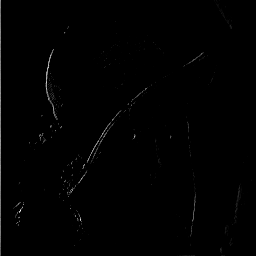

In [52]:
itorch.image(r[3])

**Fully Connected Layer**  
Usually a 2-layer perceptron

In [54]:
small_image = torch.randn(16,4,4)
module4 = nn.Sequential()
module4:add(nn.Reshape(16*4*4))
module4:add(nn.Linear(16*4*4, 50))
module4:add(nn.Tanh())
module4:add(nn.Linear(50, 10))

In [55]:
module4:forward(small_image)

-0.1929
 0.3311
 0.0259
 0.2500
 0.1975
 0.0470
-0.1450
 0.4124
-0.5561
-0.2222
[torch.DoubleTensor of size 10]



**Dropout**

In [57]:
a = torch.ones(4)
a[2] = 3

In [58]:
a

 1
 3
 1
 1
[torch.DoubleTensor of size 4]



In [59]:
module5 = nn.Dropout()

In [60]:
module5:forward(a)

 0
 0
 2
 0
[torch.DoubleTensor of size 4]



In [61]:
module5:training()

In [62]:
module5:forward(a)

 2
 6
 2
 2
[torch.DoubleTensor of size 4]



**Let's make a CNN**

input-size - 3x512x512  
convolution(number of output planes = 16, kernel-size = 5x5, stride = 2x2, padding = 2x2)  
max-pooling(2x2, no stride)   
convolution(number of output planes = 32, kernel-size = 5x5, stride = 2x2)  
max-pooling(3x3)  


In [63]:
model = nn.Sequential()
model:add(nn.SpatialConvolutionMM(3,16,5,5,2,2,2,2))
model:add(nn.Tanh())
model:add(nn.SpatialMaxPooling(2,2))
model:add(nn.SpatialConvolutionMM(16,32,5,5,2,2))
model:add(nn.Tanh())
model:add(nn.SpatialMaxPooling(3,3))

**What is the size of the input to the fully-connected layer?**

In [64]:
s = model:forward(lena);

In [66]:
s:size();

In [67]:
model:add(nn.Reshape(?))
model:add(nn.Linear(?, 200))
model:add(nn.Tanh())
model:add(nn.Linear(200,10))

In [77]:
model;

[string "model;..."]:1: '=' expected near ';': 

In [69]:
t = model:forward(lena)

In [70]:
t

-0.0238
-0.0078
-0.0295
 0.0531
-0.1286
-0.0138
-0.0578
 0.0392
-0.0706
-0.0833
[torch.DoubleTensor of size 10]



In [71]:
u = model:backward(lena, torch.randn(10))

In [72]:
u:size()

   3
 512
 512
[torch.LongStorage of size 3]



In [74]:
u[{{1},{1,4},{1,4}}]

(1,.,.) = 
 0.0001 *
   0.7514  0.8820  0.7356 -1.0757
  -0.5352 -1.7596  0.3448 -0.5273
   1.0010  1.6470  3.0799 -0.2373
  -3.0778  0.7549  1.1447 -0.4898
[torch.DoubleTensor of size 1x4x4]



**How to perform Gradient Descent**

In [78]:
params, paramx = model:getParameters();

In [85]:
params:size()

 2576258
[torch.LongStorage of size 1]



In [90]:
params[1] -- lua is 1-based

-0.02138002865476	


In [86]:
paramx:size()

 2576258
[torch.LongStorage of size 1]



In [91]:
paramx[1]

-0.019906194109804	


In [92]:
eta = 0.1
params:add(-eta, paramx)

In [93]:
params[1]

-0.019389409243779	
